In [1]:
# !wget http://www.al.sp.gov.br/repositorioDados/agenda/agenda_eventos.xml

In [2]:
ls

agenda_eventos.xml  Analise_marcacao_salas_ano.png  ma.ipynb  Untitled.ipynb


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import xml.etree.ElementTree as ET
# tree = ET.parse('country_data.xml')
# root = tree.getroot()

In [5]:
from tqdm import tqdm
def getvalueofnode(node):
    """ return node text or None """
    return node.text if node is not None else None
def xml_pandas(xml_path):
    """ main """
    parsed_xml = ET.parse(xml_path)
    df_xml = []
    for node in tqdm(parsed_xml.getroot()):
        serie = [getvalueofnode(node.find('IdEvento')),
        getvalueofnode(node.find('Data')),
        getvalueofnode(node.find('HoraIni')),
        getvalueofnode(node.find('HoraFim')),
        getvalueofnode(node.find('Descricao')),
        getvalueofnode(node.find('Titulo')),
        getvalueofnode(node.find('Obs')),
        getvalueofnode(node.find('Local')),
        getvalueofnode(node.find('Publico')),
        getvalueofnode(node.find('Solicitante')),
        getvalueofnode(node.find('IdPai')),
        getvalueofnode(node.find('JustCancel')),
        getvalueofnode(node.find('FlagCancelado')),
        getvalueofnode(node.find('FlagTransferido')),
        getvalueofnode(node.find('DataTransferido')),
        getvalueofnode(node.find('FlagProxDia')),
        getvalueofnode(node.find('DataProxDia'))]
        
        df_xml.append(serie)
    return(df_xml)
xml_df = xml_pandas('agenda_eventos.xml')


100%|██████████| 32462/32462 [00:00<00:00, 127300.71it/s]


In [6]:
dfcols = ['IdEvento', 'Data', 'HoraIni', 'HoraFim', 'Descricao', 'Titulo', 'Obs', 'Local', 'Publico', 'Solicitante', 'IdPai', 'JustCancel', 'FlagCancelado','FlagTransferido', 'DataTransferido', 'FlagProxDia', 'DataProxDia']

df = pd.DataFrame(xml_df,columns=dfcols)

In [7]:
df['Data'] = df['Data'].apply(lambda x : pd.to_datetime(x).date())

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32462 entries, 0 to 32461
Data columns (total 17 columns):
IdEvento           32462 non-null object
Data               32462 non-null object
HoraIni            32462 non-null object
HoraFim            32462 non-null object
Descricao          32462 non-null object
Titulo             2098 non-null object
Obs                7773 non-null object
Local              32462 non-null object
Publico            29502 non-null object
Solicitante        32450 non-null object
IdPai              7023 non-null object
JustCancel         1637 non-null object
FlagCancelado      32462 non-null object
FlagTransferido    32462 non-null object
DataTransferido    266 non-null object
FlagProxDia        32462 non-null object
DataProxDia        4989 non-null object
dtypes: object(17)
memory usage: 4.2+ MB


In [9]:
dep_list=[]
for dep in df.Solicitante.value_counts().index:
    if dep.split(' ')[0] in ['Dep','Deputadas','Dep,',' Dep', 'Deputados', 'Dep.','Deputada.' ,'Deputada','Deputado', 'Deputado.',  'Deps.', 'Deps']:
        dep_list.append(dep)
                        
deps_df = df[[dep in dep_list for dep in df.Solicitante.values]]

In [10]:
marc_unicas = (deps_df.Solicitante.value_counts().sum())
solicitantes_ = {nome: marcacoes for nome, marcacoes in list(deps_df.Solicitante.value_counts().items())}
deps_df['Proporcao'] = deps_df.Solicitante.apply(lambda x : solicitantes_[x]/marc_unicas*100)

/home/wayn/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
df['Data'] = pd.to_datetime(df['Data'])

In [13]:
print(len(df.Solicitante.unique()))

print(df.Solicitante.value_counts())

916
Dep. Carlos Giannazi           1647
ILP                            1570
Presidência                    1268
Dep. Fernando Capez             817
Departamento de Comunicação     737
                               ... 
CPI  dos Cursos de Medicina       1
APMAL                             1
COMITE DO PORTAL                  1
Dep. Edmur Mesquita               1
Círculo Militar                   1
Name: Solicitante, Length: 915, dtype: int64


In [24]:
df_2018 = df[[i.year == 2018 for i in df.Data]]

In [25]:
df_2018

,IdEvento,Data,HoraIni,HoraFim,Descricao,Titulo,Obs,Local,Publico,Solicitante,IdPai,JustCancel,FlagCancelado,FlagTransferido,DataTransferido,FlagProxDia,DataProxDia
27155,2c94803561aef2d60161af5993570009,2018-02-26,10:00,12:30,Sessão Solene com a finalidade de conceder o C...,None,None,Plenário Juscelino Kubitschek,geral,Dep. Roberto Massafera,None,None,0,0,None,0,None
27156,2c94803561aef2d60161b9c856cd0060,2018-02-26,11:00,15:00,Horário: 11h00 às 15h00./\nReunião do mandato ...,None,None,Sala de Reunião T-113 - Térreo - Prédio Anexo,interno,Dep. Carlos Neder,None,None,0,0,None,0,None
27157,2c94803561aef2d60161b9c9490c0063,2018-02-27,15:00,22:00,Horário: 15h00 às 22h00./\nReunião do mandato ...,None,None,Sala de Reunião T-114 - Térreo - Prédio Anexo,interno,Dep. Carlos Neder,None,None,0,0,None,0,None
27158,2c94803561aef2d60161b9cb728b0067,2018-03-01,10:00,12:00,Horário: 10h00 às 12h00./\n3ª Semana da Cidada...,None,None,Sala de Reunião 3113 - 3º and. - Prédio Anexo,interno,Dep. Celino Cardoso,None,None,0,0,None,0,None
27159,2c948035623e0c8a01624048bd920050,2018-03-21,15:00,15:59,Reunião da Comissão de Defesa dos Direitos da ...,None,None,Plenário José Bonifácio,geral,Comissão de Defesa dos Direitos da Pessoa Huma...,None,None,1,0,None,0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32455,2c948035676342a80167665976b10029,2018-12-04,15:00,15:29,"Reunião da Comissão de Finanças, Orçamento e P...",None,None,Plenário Tiradentes,geral,"Comissão de Finanças, Orçamento e Planejamento",None,None,1,0,None,0,None
32456,2c94803567bff51d0167c22f75440004,2018-12-18,14:00,15:00,Visita monitorada dos vereadores mirins da Câm...,None,None,Plenário Juscelino Kubitschek,geral,Departamento de Comunicação,None,None,0,0,None,0,None
32457,2c94803566ce22fb0166d0c288d90010,2018-11-26,08:00,12:00,Horário: 09h00 às 12h00/ Audiência pública - U...,None,None,Auditório Teotônio Vilela,geral,Dep. Marcos Martins,None,None,0,0,None,0,None
32458,2c9480356796c244016799f502960017,2018-12-12,11:00,11:29,Reunião da CPI Exploração Infanto-Juvenil com ...,None,None,Plenário Tiradentes,geral,CPI Exploração Infanto-Juvenil,None,None,0,0,None,0,None


In [26]:
df_2018['Publico'].unique()

array(['geral', 'interno', 'externo'], dtype=object)

In [27]:
df_2018['Local'].unique()

array(['Plenário Juscelino Kubitschek',
       'Sala de Reunião T-113 - Térreo - Prédio Anexo',
       'Sala de Reunião T-114 - Térreo - Prédio Anexo',
       'Sala de Reunião 3113 - 3º and.  - Prédio Anexo',
       'Plenário José Bonifácio',
       'Sala de Reunião 1114 - 1º and.  - Prédio Anexo', 'Herois de 32',
       'Sala de Reunião 1113 - 1º and.  - Prédio Anexo',
       'Auditório Paulo Kobayashi', 'Auditório Franco Montoro',
       'Sala de Conferência do ILP', 'Plenário Dom Pedro I',
       'Espaço Cultural V Centenário', 'Estacionamento da ALESP',
       'Salão dos Espelhos', 'Hall Monumental', 'Espaço Café São Paulo',
       'Auditório Teotônio Vilela', 'Plenário Tiradentes',
       'Espaço Heróis de 32', 'Espaço Villas Boas', 'Espaço Herois de 32',
       'Café São Paulo (Parcial)', 'V Centenário', 'Galeria 1º andar',
       'Câmara Municipal de Itararé', 'Câmara Municipal de Bauru',
       'Local não divulgado', 'Espaço do Servidor', 'Galeria do 1º Andar',
       'Espaço d

In [28]:
df_2018[df_2018['Local'] == 'Estacionamento']

,IdEvento,Data,HoraIni,HoraFim,Descricao,Titulo,Obs,Local,Publico,Solicitante,IdPai,JustCancel,FlagCancelado,FlagTransferido,DataTransferido,FlagProxDia,DataProxDia
30367,2c9480356459d98301645c65d85c0006,2018-07-22,08:00,17:00,Convenção do PSC,None,None,Estacionamento,interno,Liderança do PSC,None,None,0,0,None,0,None


In [29]:
df_2018[df_2018['Local'] == 'Local não divulgado']

,IdEvento,Data,HoraIni,HoraFim,Descricao,Titulo,Obs,Local,Publico,Solicitante,IdPai,JustCancel,FlagCancelado,FlagTransferido,DataTransferido,FlagProxDia,DataProxDia
27768,2c948035629bbcd80162afbe6d5b0039,2018-04-27,11:00,12:00,Visita monitorada dos participantes do Parlame...,None,None,Local não divulgado,geral,Departamento de Comunicação,None,None,0,0,None,0,None
31524,2c9480356436acb501643733c6840006,2018-06-28,14:00,15:00,Visita monitorada dos participantes da delegaç...,None,None,Local não divulgado,geral,Departamento de Comunicação,None,None,0,0,None,0,None


In [30]:
dep_list=[]
for dep in df_2018.Solicitante.value_counts().index:
    if dep.split(' ')[0] in ['Dep','Deputadas','Dep,',' Dep', 'Deputados', 'Dep.','Deputada.' ,'Deputada','Deputado', 'Deputado.',  'Deps.', 'Deps']:
        dep_list.append(dep)
deps_df = df_2018[[dep in dep_list for dep in df_2018.Solicitante.values]]

In [31]:
deps_df['FlagCancelado'].value_counts()

0    2102
1     264
Name: FlagCancelado, dtype: int64

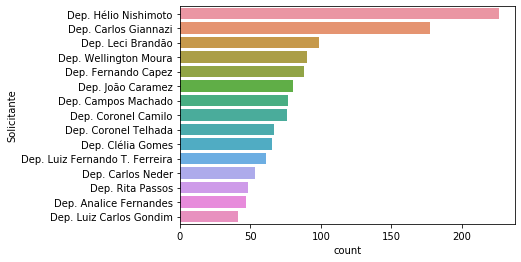

In [32]:
sns.countplot(y='Solicitante', data=deps_df, order=deps_df.Solicitante.value_counts().iloc[:15].index, orient='v',  )

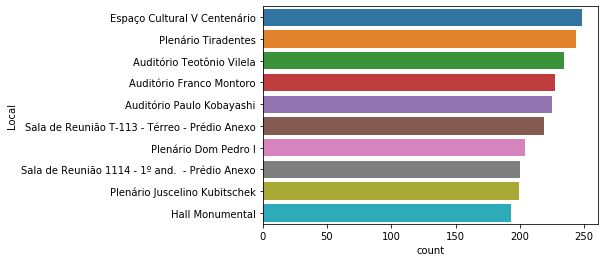

In [33]:
sns.countplot(y='Local', data=df_2018, order=df_2018.Local.value_counts().iloc[:10].index, orient='v')

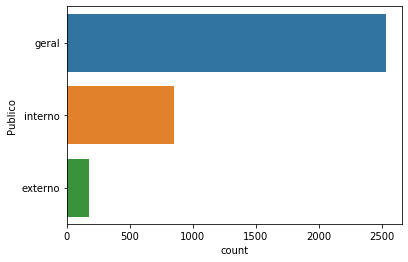

In [34]:
sns.countplot(y='Publico', data=df_2018, order=df_2018.Publico.value_counts().iloc[:10].index, orient='v')

In [35]:
df['mes'] = df.Data.apply(lambda x : x.month)
df['ano'] = df.Data.apply(lambda x : x.year)

In [36]:
from pylab import rcParams
rcParams['figure.figsize'] = 16,8

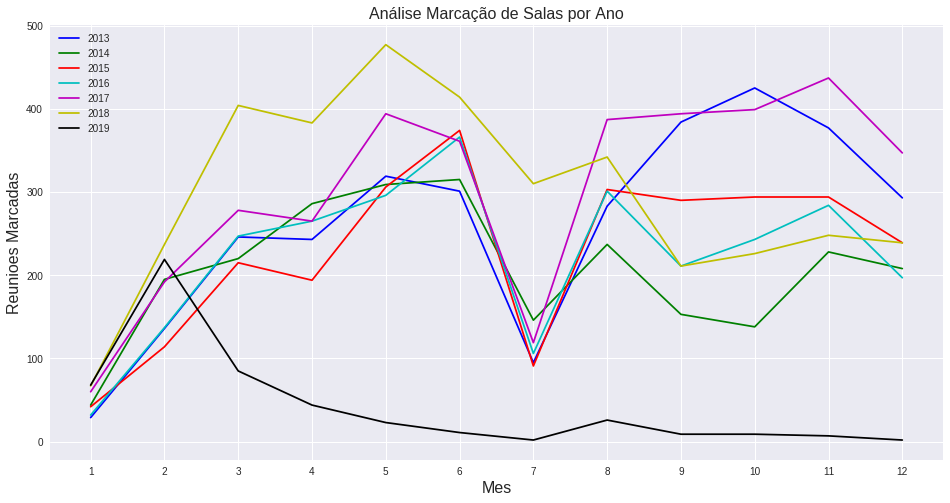

In [37]:
plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (16,8)
colors=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

for index,ano in enumerate(range(2013,2020)):
    d = []
    for mes in range(1,13):
        d.append(len(df[(df['ano'] == ano) & (df['mes'] == mes)]))
    
    (plt.plot(list(range(1,13)), d, label=ano, color=colors[index]))
plt.legend()
plt.xlabel('Mes', fontsize=16)
plt.xticks(list(range(1,13)))
plt.ylabel('Reunioes Marcadas', fontsize=16)
plt.title('Análise Marcação de Salas por Ano', fontsize=16)
plt.savefig('Analise_marcacao_salas_ano')